In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/airline_review.csv')
display(df.head(10))
print(df.shape)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
 df.isna().sum()

,0
airline,65948
overall,67878
author,65948
review_date,65948
customer_review,65948
aircraft,112177
traveller_type,92140
cabin,68592
route,92169
date_flown,92262


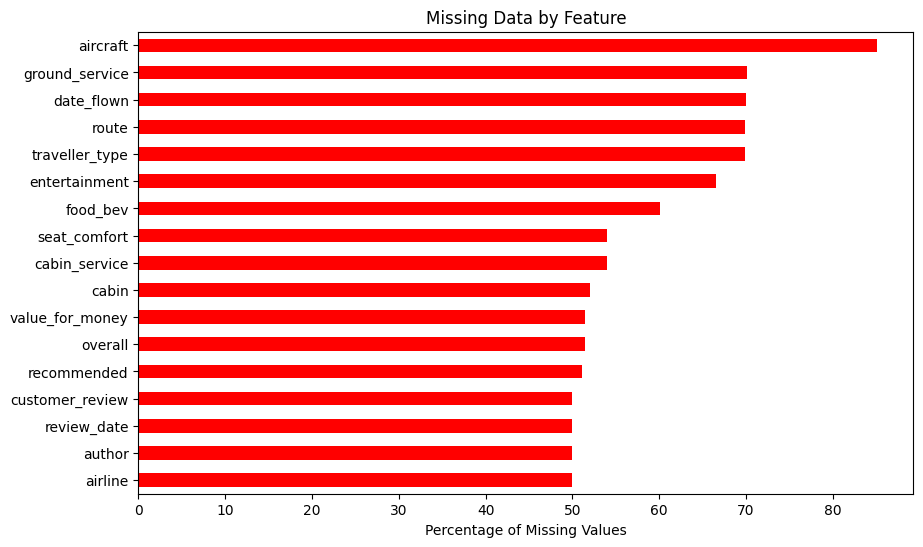

In [ ]:
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent >0].sort_values()
plt.figure(figsize=(10,6))
missing_percent.plot(kind='barh',  color='red')
plt.xlabel("Percentage of Missing Values")
plt.title("Missing Data by Feature")
plt.show()

In [ ]:
df.shape

(131895, 17)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(61184, 17)

In [ ]:
df.nunique()

,0
airline,81
overall,10
author,44069
review_date,3015
customer_review,61172
aircraft,2088
traveller_type,4
cabin,4
route,24549
date_flown,63


In [ ]:
df.sample(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
25257,Southwest Airlines,NaN,D Hayes,5th November 2012,My husband and I flew from Las Vegas to Baltim...,NaN,NaN,Economy Class,NaN,NaN,1.0,4.0,2.0,NaN,NaN,1.0,no
91709,Air Canada rouge,1.0,K Kad,28th September 2014,I have been a loyal Air Canada customer since ...,NaN,NaN,Economy Class,NaN,NaN,1.0,4.0,1.0,1.0,NaN,1.0,no
122176,Icelandair,6.0,D Vassilakis,21st October 2017,âœ… Verified Review | Paris CDG to Newark via ...,NaN,Solo Leisure,Economy Class,Paris CDG to Newark via Keflavik,October 2017,5.0,5.0,1.0,1.0,5.0,2.0,yes
121930,Frontier Airlines,NaN,Michelle Ratcliff,30th November 2012,We were supposed to leave on a 1.12 flight to ...,NaN,NaN,Economy Class,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,no
33901,Aeroflot Russian Airlines,8.0,Daniel Tzur,20th November 2016,Phuket to Tel Aviv via Moscow with Aeroflot. T...,Boeing 777-300ER,Solo Leisure,Premium Economy,HKT to TLV via SVO,November 2016,3.0,3.0,3.0,3.0,3.0,4.0,yes
125906,Alaska Airlines,6.0,I Chandramouli,19th July 2016,"AS 3380, Portland - San Jose, operated by Skyw...",Embraer 175,Family Leisure,Economy Class,PDX to SJC,July 2016,4.0,3.0,4.0,2.0,5.0,5.0,yes
4701,Qatar Airways,10.0,Philip Hall,13th November 2015,I recently flew Bangkok to Dubai via Doha and ...,A380 / A330 / A321,Business,Economy Class,BKK to LHR via DOH,October 2015,5.0,5.0,4.0,5.0,5.0,5.0,yes
113134,Vueling Airlines,1.0,B Tannelli,21st July 2017,âœ… Verified Review | London to Santorini via ...,NaN,Family Leisure,Economy Class,London to Santorini via Rome,July 2017,1.0,1.0,1.0,1.0,1.0,1.0,no
22405,Delta Air Lines,2.0,MarÃ­a Monge,14th January 2016,"San JosÃ©, Costa Rica to Los Ãngeles with Del...",Boeing 757,Family Leisure,Economy Class,SJO to LAX,January 2016,2.0,3.0,2.0,1.0,2.0,2.0,no
84549,SAS Scandinavian,4.0,Frederick Chiriboga,31st May 2015,We flew from Dulles to Copenhagen in May we we...,NaN,NaN,Premium Economy,NaN,NaN,1.0,2.0,1.0,1.0,NaN,2.0,no


In [ ]:
rating_cols = ["overall", "seat_comfort", "cabin_service", "food_bev","entertainment", "ground_service", "value_for_money"]

In [ ]:
df['recommended'].value_counts(normalize=True)

,proportion
recommended,
no,0.523217
yes,0.476783


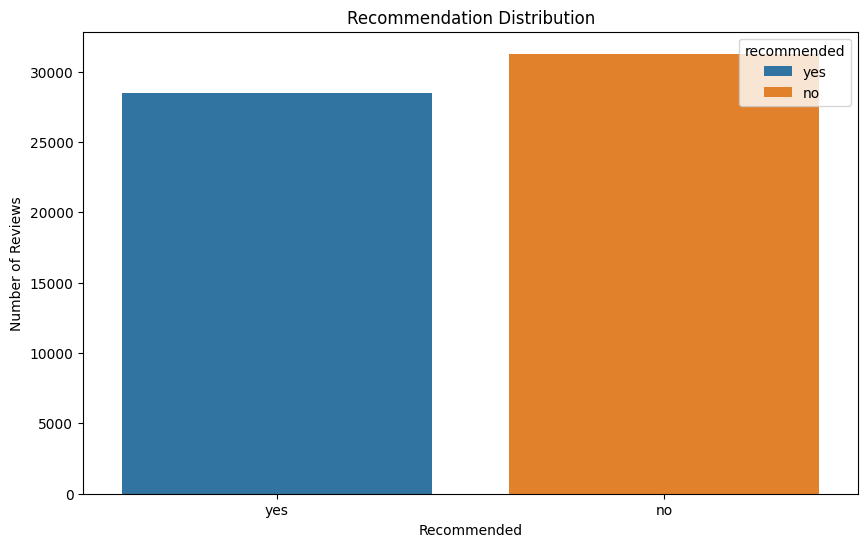

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="recommended",hue='recommended')
plt.title("Recommendation Distribution")
plt.xlabel("Recommended")
plt.ylabel("Number of Reviews")
plt.show()

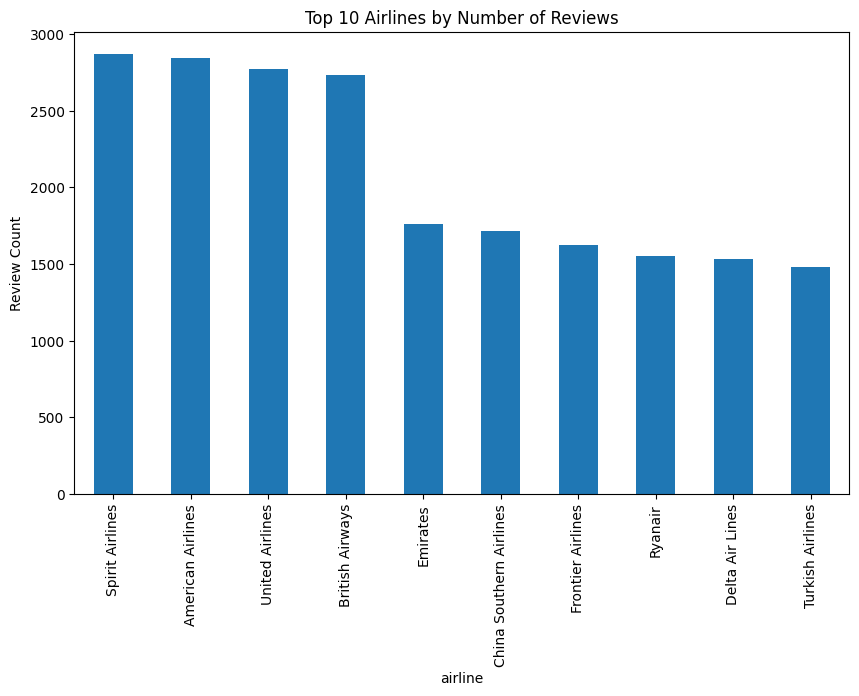

In [ ]:
top_airlines = df["airline"].value_counts().head(10)
plt.figure(figsize=(10,6))
top_airlines.plot(kind="bar")
plt.title("Top 10 Airlines by Number of Reviews")
plt.ylabel("Review Count")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_clean = df.dropna(subset=["airline", "recommended", "overall"])
df_clean["recommended"] = df_clean["recommended"].map({"yes": True, "no": False})
df_clean["recommended_num"] = df_clean["recommended"].astype(int)

<ipython-input-199-7ae6ba8967ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["recommended"] = df_clean["recommended"].map({"yes": True, "no": False})
<ipython-input-199-7ae6ba8967ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["recommended_num"] = df_clean["recommended"].astype(int)


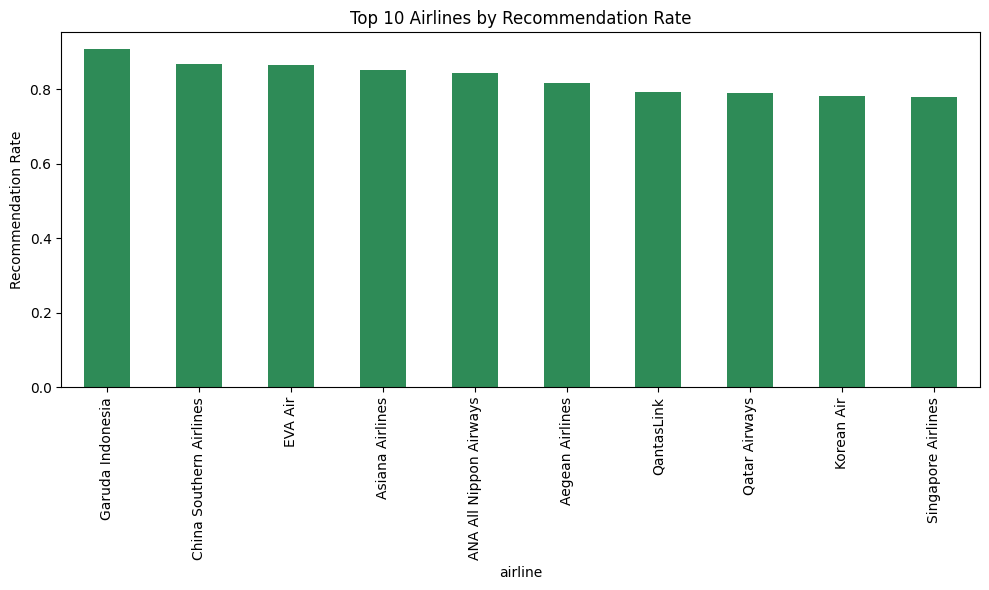

In [ ]:
airline_recommendation = df_clean.groupby("airline")["recommended_num"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
airline_recommendation.plot(kind="bar", color="seagreen")
plt.title("Top 10 Airlines by Recommendation Rate")
plt.ylabel("Recommendation Rate")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


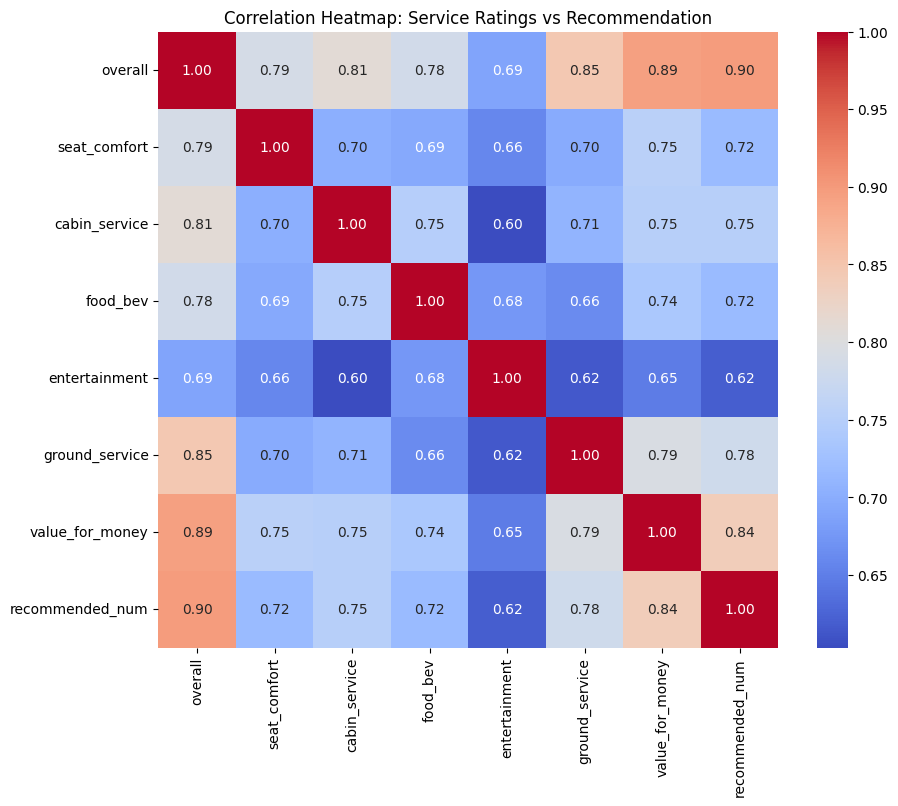

In [ ]:
correlation = df_clean[rating_cols + ["recommended_num"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Service Ratings vs Recommendation")
plt.show()

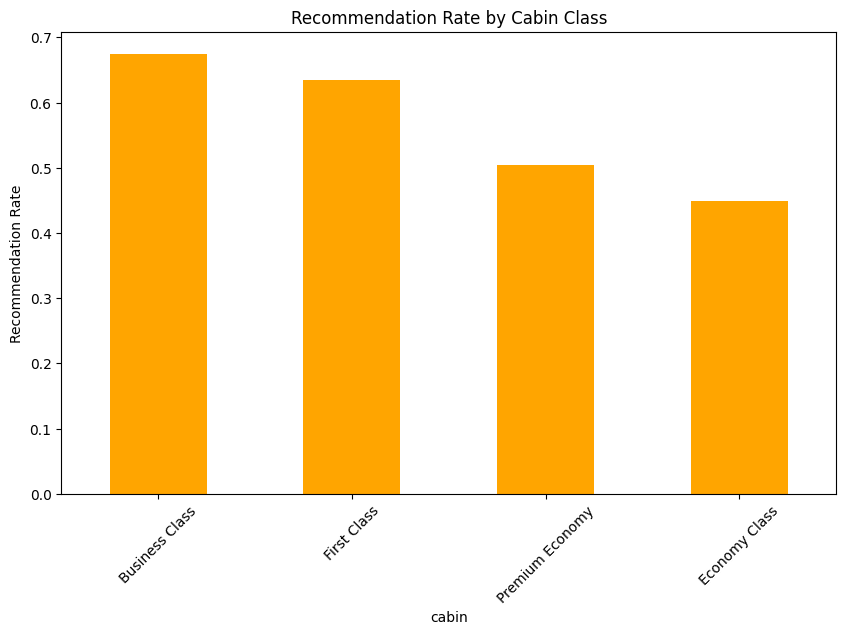

In [ ]:
cabin_recommend = df_clean.groupby("cabin")["recommended_num"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
cabin_recommend.plot(kind="bar", color="orange")
plt.title("Recommendation Rate by Cabin Class")
plt.ylabel("Recommendation Rate")
plt.xticks(rotation=45)
plt.show()

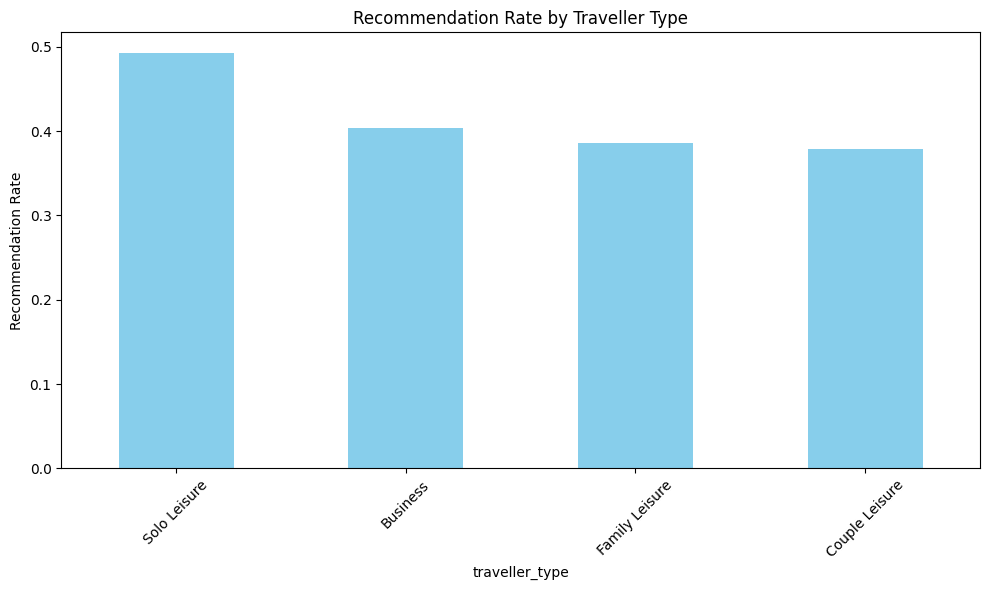

In [ ]:
traveller_recommend = df_clean.groupby("traveller_type")["recommended_num"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
traveller_recommend.plot(kind="bar", color="skyblue")
plt.title("Recommendation Rate by Traveller Type")
plt.ylabel("Recommendation Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

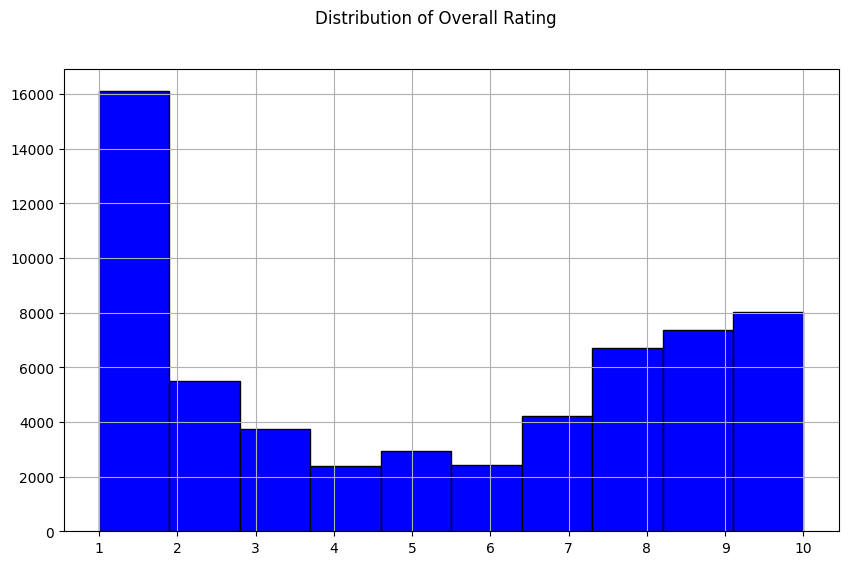

In [ ]:
plt.figure(figsize=(10,6))
df['overall'].hist(bins=10, color="blue", edgecolor="black")
plt.suptitle("Distribution of Overall Rating ")
plt.xticks(range(1, 11))
plt.show()

In [ ]:
df.shape

(61184, 17)

In [ ]:
df['date_flown']=pd.to_datetime(df['date_flown'],errors='coerce')
df['review_date']=pd.to_datetime(df['review_date'],errors='coerce')

<ipython-input-206-f3312c0bc53e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_flown']=pd.to_datetime(df['date_flown'],errors='coerce')


In [ ]:
df.shape

(61184, 17)

In [ ]:
df.isna().sum()

,0
airline,1
overall,1783
author,1
review_date,13221
customer_review,1
aircraft,42696
traveller_type,23644
cabin,2479
route,23671
date_flown,26388


In [ ]:
df.dropna(subset="recommended",how="any",inplace=True)

In [ ]:
df1=df.copy()
df1["year"] = df["review_date"].dt.year
df1["month"] = df["review_date"].dt.to_period("M").astype(str)
df1["recommended"] = df1["recommended"].map({"yes": True, "no": False})
df1["recommended_num"] = df1["recommended"].astype(int)

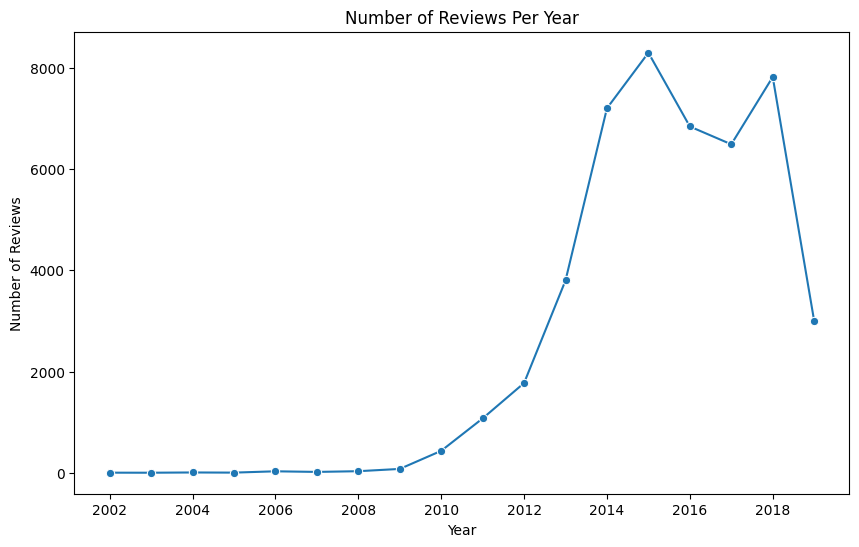

In [ ]:
reviews_by_year = df1["year"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=reviews_by_year.index, y=reviews_by_year.values, marker="o")
plt.title("Number of Reviews Per Year")
x_ticks = range(2002,2020,2)
plt.xticks(x_ticks)
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

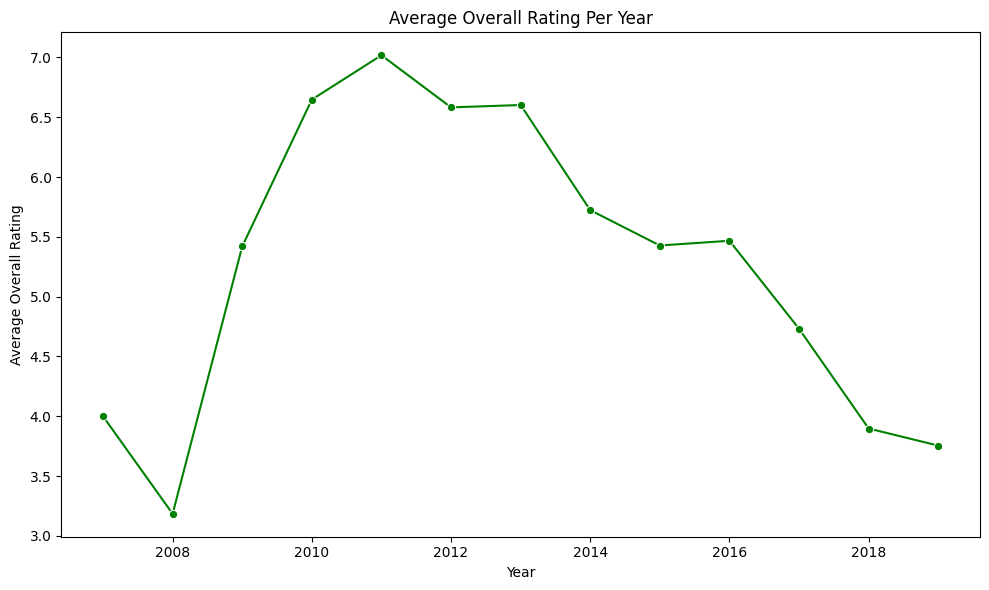

In [ ]:
avg_rating_by_year = df1.groupby("year")["overall"].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_rating_by_year.index, y=avg_rating_by_year.values, marker="o", color="green")
plt.title("Average Overall Rating Per Year")
plt.xlabel("Year")
plt.ylabel("Average Overall Rating")
plt.tight_layout()
plt.show()

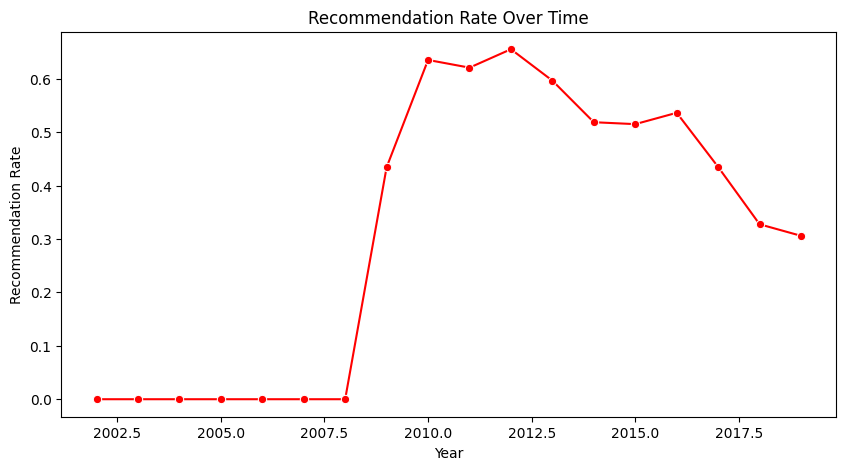

In [ ]:
rec_rate_by_year = df1.groupby("year")["recommended_num"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=rec_rate_by_year.index, y=rec_rate_by_year.values, marker="o", color="red")
plt.title("Recommendation Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Recommendation Rate")
plt.show()

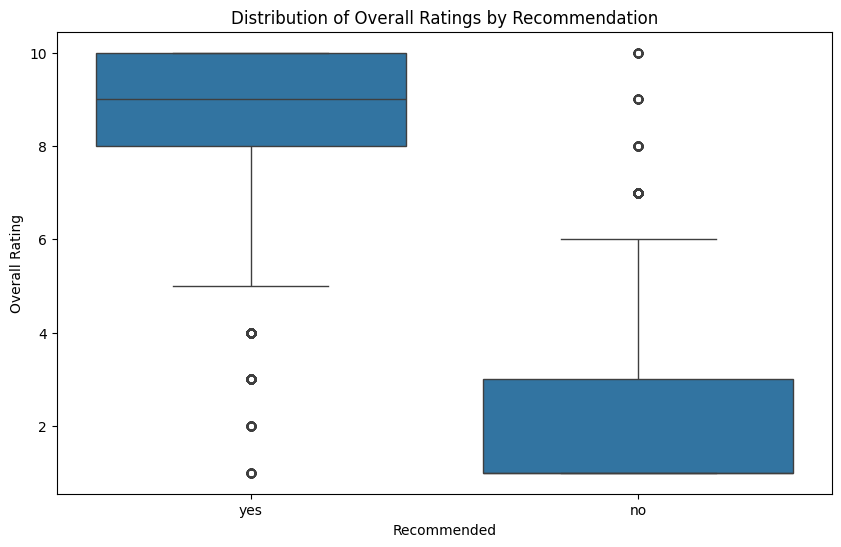

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="recommended", y="overall")
plt.title("Distribution of Overall Ratings by Recommendation")
plt.xlabel("Recommended")
plt.ylabel("Overall Rating")
plt.show()

<ipython-input-215-887a4abe220b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cabin", y="value_for_money", palette="Set1")


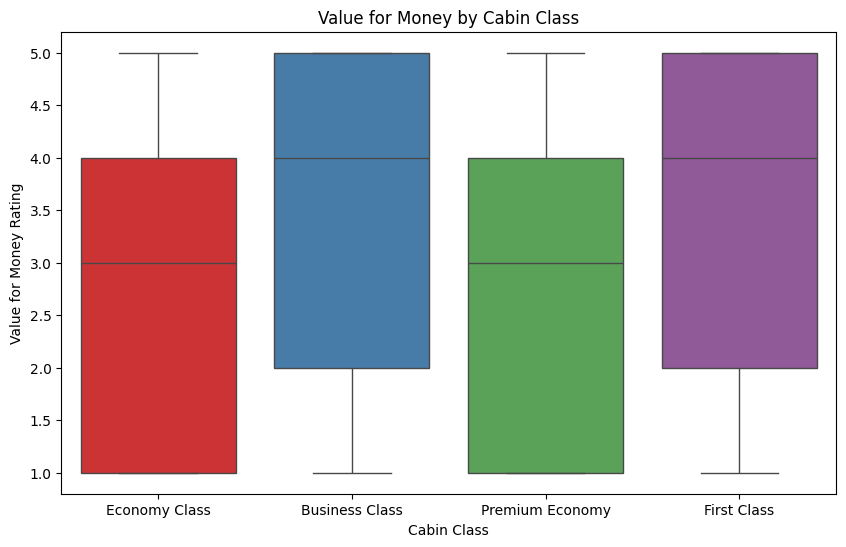

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="cabin", y="value_for_money", palette="Set1")
plt.title("Value for Money by Cabin Class")
plt.xlabel("Cabin Class")
plt.ylabel("Value for Money Rating")
plt.show()

<ipython-input-216-d0c108d61912>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="traveller_type", y="seat_comfort", palette="Set1")


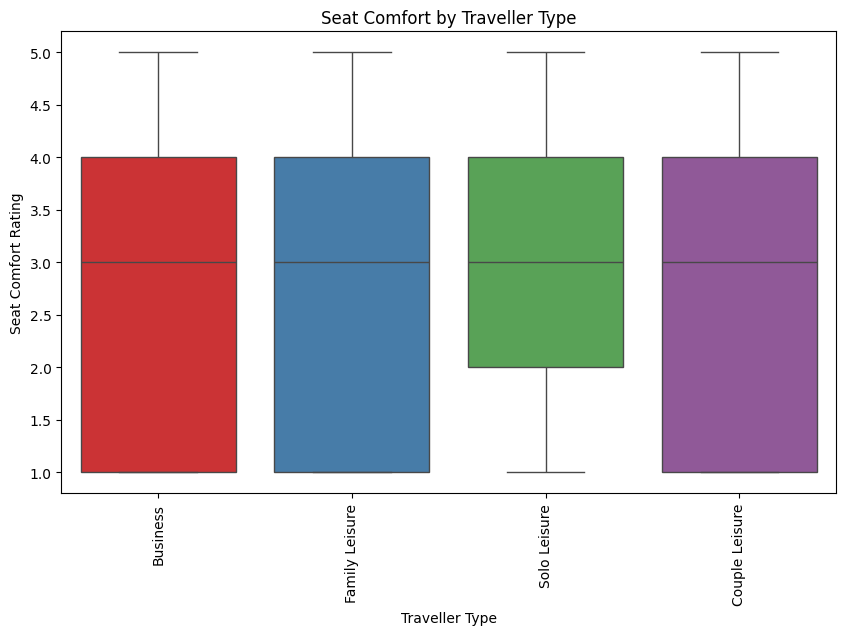

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="traveller_type", y="seat_comfort", palette="Set1")
plt.title("Seat Comfort by Traveller Type")
plt.xlabel("Traveller Type")
plt.ylabel("Seat Comfort Rating")
plt.xticks(rotation=90)
plt.show()

In [ ]:
indigo_df = df[df["airline"].str.lower() == "indigo"].copy()
indigo_df["recommended"] = indigo_df["recommended"].str.lower().map({"yes": True, "no": False})
indigo_df["recommended_num"] = indigo_df["recommended"].astype(int)
indigo_df["review_date"] = pd.to_datetime(indigo_df["review_date"], errors="coerce")
indigo_df = indigo_df.dropna(subset=["review_date", "overall"])
indigo_df["year"] = indigo_df["review_date"].dt.year
indigo_df["month"] = indigo_df["review_date"].dt.to_period("M").astype(str)

<ipython-input-218-1cffc0058335>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=indigo_df, x="year", palette="Blues")


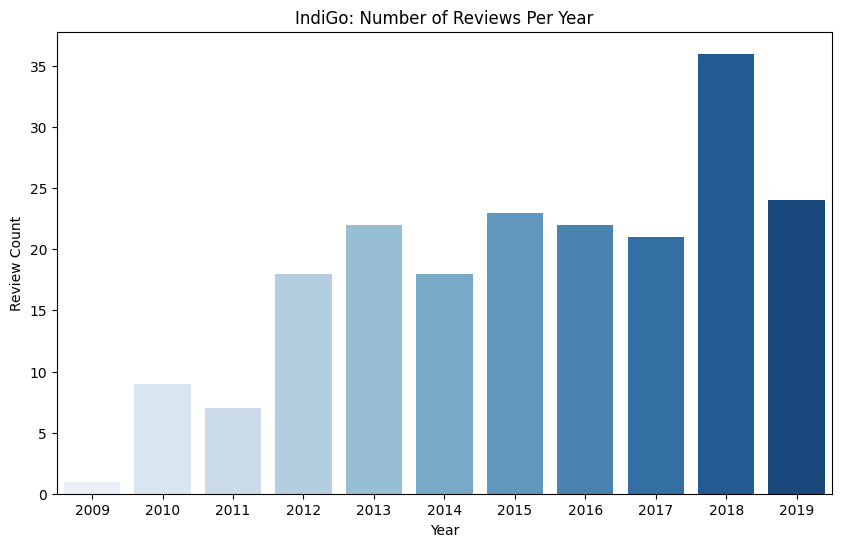

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=indigo_df, x="year", palette="Blues")
plt.title("IndiGo: Number of Reviews Per Year")
plt.xlabel("Year")
plt.ylabel("Review Count")
plt.show()

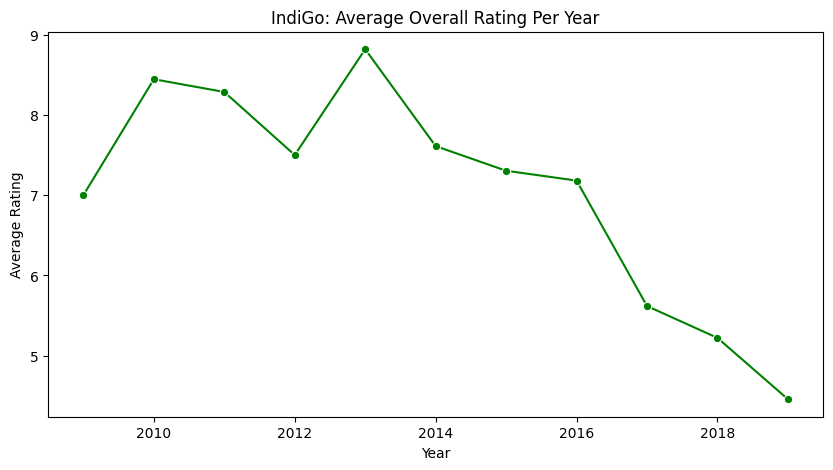

In [ ]:
avg_rating_year = indigo_df.groupby("year")["overall"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_rating_year.index, y=avg_rating_year.values, marker="o", color="green")
plt.title("IndiGo: Average Overall Rating Per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

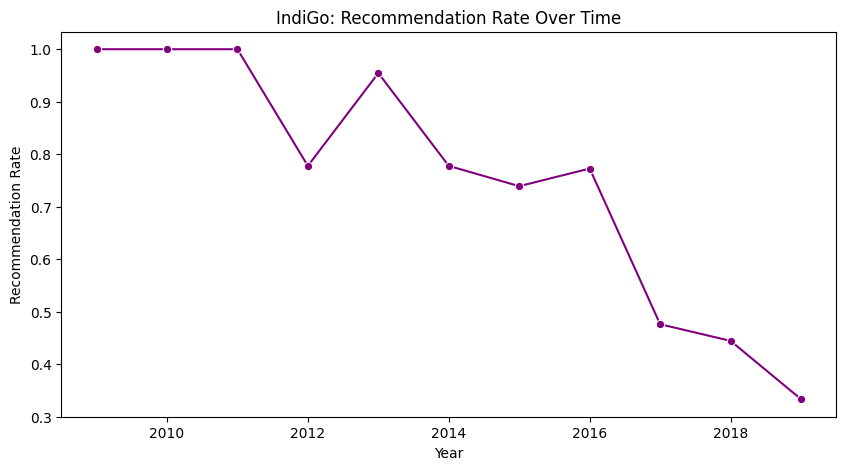

In [ ]:
rec_rate_year = indigo_df.groupby("year")["recommended_num"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=rec_rate_year.index, y=rec_rate_year.values, marker="o", color="purple")
plt.title("IndiGo: Recommendation Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Recommendation Rate")
plt.show()

<ipython-input-221-1534e57aa248>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=indigo_df, x="traveller_type", y="overall", palette="coolwarm")


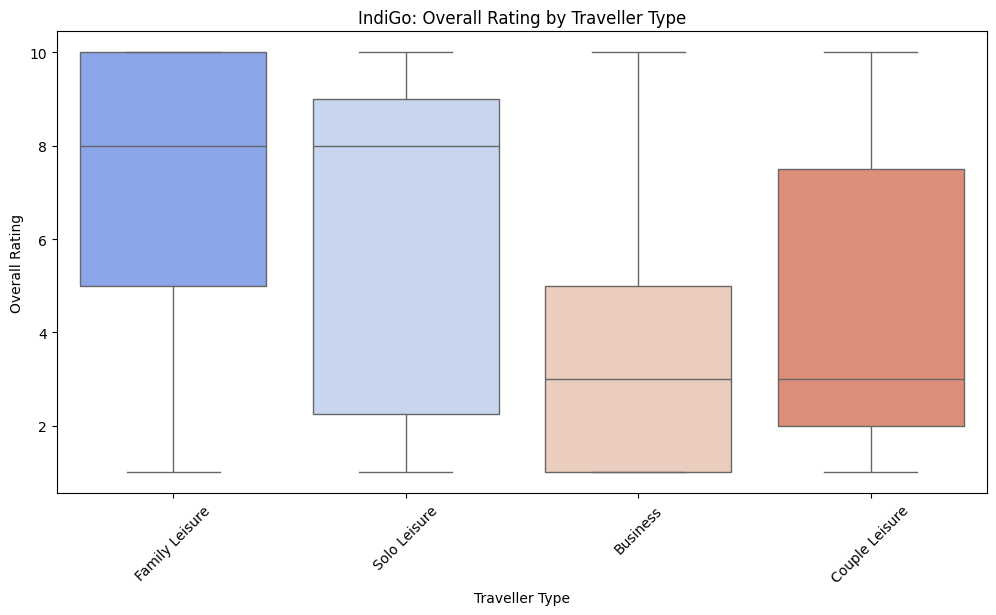

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=indigo_df, x="traveller_type", y="overall", palette="coolwarm")
plt.title("IndiGo: Overall Rating by Traveller Type")
plt.xlabel("Traveller Type")
plt.ylabel("Overall Rating")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df2 = df.copy()
df2["airline"] = df2["airline"].str.strip().str.lower()
df2["recommended"] = df2["recommended"].str.lower().map({"yes": True, "no": False})
df2["recommended_num"] = df2["recommended"].astype(int)
df2["review_date"] = pd.to_datetime(df2["review_date"], errors="coerce")

df2["airline_group"] = df2["airline"].apply(lambda x: "IndiGo" if x == "indigo" else "Other Airlines")

df2 = df2.dropna(subset=["review_date", "overall"])

<ipython-input-223-d0d6d762e4ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["year"] = df2["review_date"].dt.year


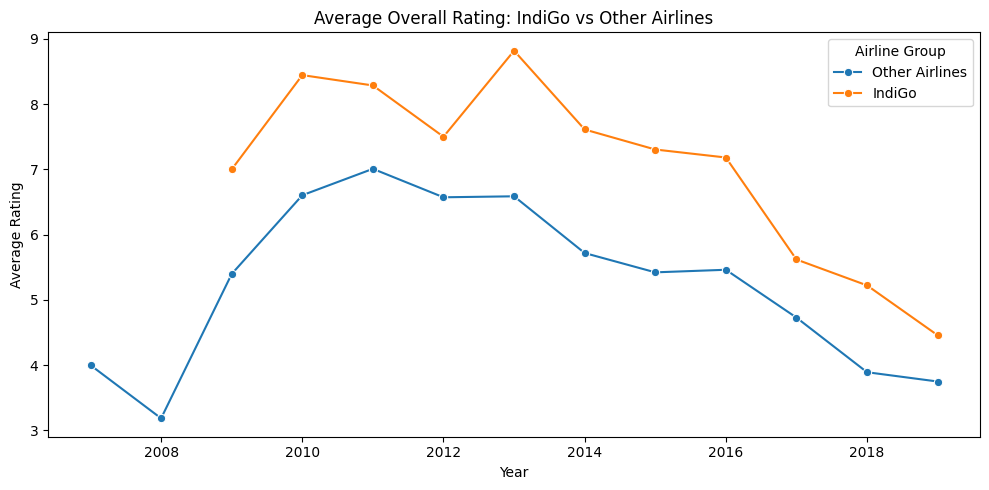

In [ ]:
df2["year"] = df2["review_date"].dt.year
plt.figure(figsize=(10, 5))
sns.lineplot(data=df2, x="year", y="overall", hue="airline_group", estimator="mean", errorbar=None, marker="o")
plt.title("Average Overall Rating: IndiGo vs Other Airlines")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(title="Airline Group")
plt.tight_layout()
plt.show()

<ipython-input-224-e8ab0a1024fb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df2,x="year",y="recommended_num",hue="airline_group",estimator="mean",ci=None,marker="o")


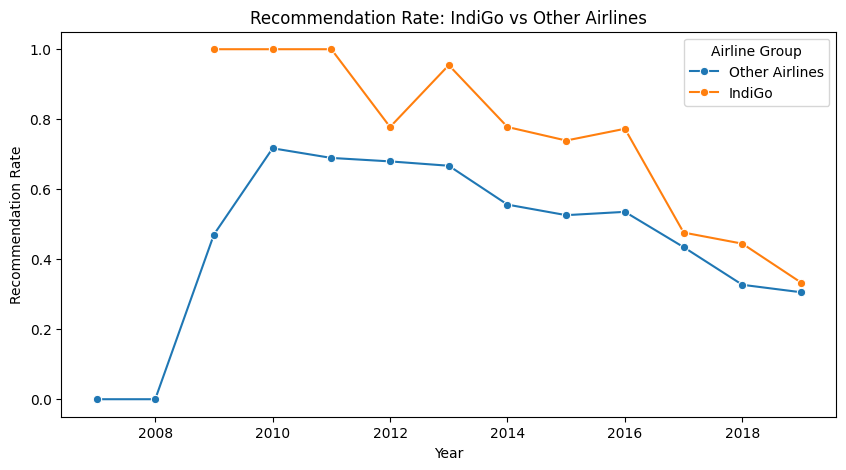

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df2,x="year",y="recommended_num",hue="airline_group",estimator="mean",ci=None,marker="o")
plt.title("Recommendation Rate: IndiGo vs Other Airlines")
plt.xlabel("Year")
plt.ylabel("Recommendation Rate")
plt.legend(title="Airline Group")
plt.show()

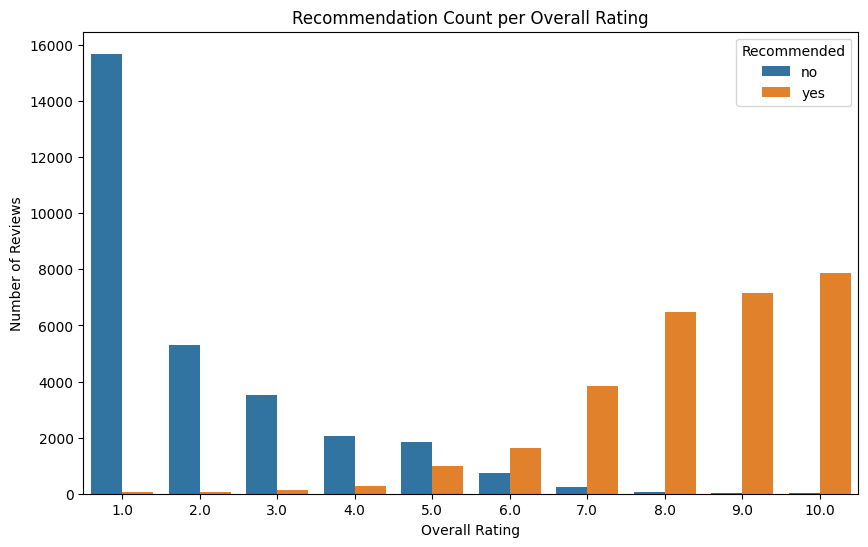

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='overall', hue='recommended')
plt.title('Recommendation Count per Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Recommended')
plt.show()

In [ ]:
cols = df.loc[df["overall"] <=3.0].index
rec_indices = df[df['recommended'] == "yes"].index

common_indices = cols.intersection(rec_indices)

filtered_df = df.loc[common_indices, ["overall", "customer_review","recommended"]]
display(filtered_df)

,overall,customer_review,recommended
207,2.0,âœ… Trip Verified | Belgrade to Kiev via Istan...,yes
257,3.0,âœ… Trip Verified | Frankfurt to Ankara. Check...,yes
563,3.0,âœ… Trip Verified | Istanbul to Athens. Overal...,yes
1363,3.0,âœ… Verified Review | Copenhagen to Dar es Sal...,yes
1453,1.0,"25 hours before the departure, Turkish Airline...",yes
...,...,...,...
127182,2.0,âœ… Trip Verified | Copenhagen to Helsinki. Fl...,yes
128936,2.0,CPH-LGW-CPH same day. Obama in CPH and snowsto...,yes
129318,3.0,Flew BAH-MNL the cabin was tired and old looki...,yes
129412,3.0,LHR-BAH. Airbus A340. Service is usually good ...,yes


In [ ]:
df.loc[(df['overall'] < 3.0) & (df['recommended'] == 'yes'), 'recommended'] = 'no'
df.loc[(df['overall'] >7.0) & (df['recommended'] == 'no'), 'recommended'] = 'yes'

In [ ]:
 df.isna().sum()

,0
airline,0
overall,1764
author,0
review_date,12884
customer_review,0
aircraft,41274
traveller_type,22222
cabin,1057
route,22249
date_flown,24965


In [ ]:
df.shape

(59761, 17)

In [ ]:
df.drop(["aircraft","author"],axis=1,inplace=True)

In [ ]:
df['cabin']=df['cabin'].fillna("Unknown")

In [ ]:
df['route_missing'] = df['route'].isna().astype(int)
df['traveller_type_missing'] = df['traveller_type'].isna().astype(int)
df['route'] = df['route'].fillna('unknown')
df['traveller_type'] = df['traveller_type'].fillna('unknown')

In [ ]:
cols = ['overall','seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']
nan_rows = df[df[cols].isna().any(axis=1)]
display(nan_rows[cols + ['recommended']])

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
13,1.0,2.0,2.0,NaN,3.0,1.0,1.0,no
21,1.0,1.0,1.0,NaN,NaN,1.0,1.0,no
25,1.0,4.0,4.0,4.0,NaN,1.0,1.0,no
39,7.0,4.0,4.0,4.0,NaN,4.0,4.0,yes
45,1.0,3.0,2.0,NaN,NaN,1.0,3.0,no
...,...,...,...,...,...,...,...,...
131886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
df.loc[df['recommended'] == 'no', cols] = df.loc[df['recommended'] == 'no', cols].fillna(0)

In [ ]:
df.loc[df['recommended'] == 'yes', cols] = df.loc[df['recommended'] == 'yes', cols].fillna(df[cols].median())

In [ ]:
df.head(7)

,airline,overall,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,route_missing,traveller_type_missing
1,Turkish Airlines,7.0,2019-05-08,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,NaT,4.0,5.0,4.0,4.0,2.0,4.0,yes,0,0
3,Turkish Airlines,2.0,2019-05-07,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,NaT,4.0,1.0,1.0,1.0,1.0,1.0,no,0,0
5,Turkish Airlines,3.0,2019-05-07,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,NaT,1.0,4.0,1.0,3.0,1.0,2.0,no,0,0
7,Turkish Airlines,10.0,2019-05-06,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,yes,0,0
9,Turkish Airlines,1.0,2019-05-06,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,0,0
11,Turkish Airlines,2.0,2019-05-05,âœ… Trip Verified | Istanbul to Budapest via D...,Couple Leisure,Economy Class,Istanbul to Budapest via Dublin,NaT,3.0,3.0,5.0,3.0,1.0,1.0,no,0,0
13,Turkish Airlines,1.0,NaT,"âœ… Trip Verified | Istanbul to Algiers, plann...",Business,Business Class,Istanbul to Algiers,2019-04-01,2.0,2.0,0.0,3.0,1.0,1.0,no,0,0


In [ ]:
cols=['review_date','date_flown']
df[cols+['recommended']].sample(20)

,review_date,date_flown,recommended
67237,2014-10-08,NaT,no
115232,2014-02-20,NaT,no
6123,2018-12-10,2018-12-01,yes
44477,2018-12-19,2018-12-01,no
26731,2018-07-04,2018-07-01,no
92297,2014-03-28,NaT,no
66483,2016-03-04,2016-03-01,no
118668,2011-06-30,NaT,no
683,2018-01-24,2018-01-01,no
113806,2015-08-06,2015-08-01,no


In [ ]:
offset = (df['review_date'] - df['date_flown']).dt.days.median()
df['review_date'] = df['review_date'].fillna(df['date_flown'] + pd.to_timedelta(offset, unit='D'))
df['date_flown'] = df['date_flown'].fillna(df['review_date'] - pd.to_timedelta(offset, unit='D'))

In [ ]:

df['review_delay'] = (df['review_date'] - df['date_flown']).dt.days
df['review_month'] = df['review_date'].dt.month
df['flight_month'] = df['date_flown'].dt.month
df.drop(['review_date', 'date_flown'], axis=1, inplace=True)



In [ ]:
df['review_delay']=df['review_delay'].fillna(df['review_delay'].median())
df['review_month_missing'] = df['review_month'].isna().astype(int)
df['flight_month_missing'] = df['flight_month'].isna().astype(int)
df['review_month'] = df['review_month'].fillna(df['review_month'].mode()[0])
df['flight_month'] = df['flight_month'].fillna(df['flight_month'].mode()[0])

In [ ]:
df.isna().sum()

,0
airline,0
overall,0
customer_review,0
traveller_type,0
cabin,0
route,0
seat_comfort,0
cabin_service,0
food_bev,0
entertainment,0


In [ ]:
df.shape

(59761, 20)

In [ ]:
df.reset_index(inplace=True)
df.drop(["index"],axis=1,inplace=True)

In [ ]:
df.head()

,airline,overall,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,route_missing,traveller_type_missing,review_delay,review_month,flight_month,review_month_missing,flight_month_missing
0,Turkish Airlines,7.0,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes,0,0,23.0,5.0,4.0,0,0
1,Turkish Airlines,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no,0,0,23.0,5.0,4.0,0,0
2,Turkish Airlines,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no,0,0,23.0,5.0,4.0,0,0
3,Turkish Airlines,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes,0,0,35.0,5.0,4.0,0,0
4,Turkish Airlines,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,no,0,0,23.0,5.0,4.0,0,0


In [ ]:
categorcial_cols=df.select_dtypes(include='object')
categorcial_cols.nunique()

,0
airline,81
customer_review,59750
traveller_type,5
cabin,5
route,24549
recommended,2


In [ ]:
df.head()

,airline,overall,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,route_missing,traveller_type_missing,review_delay,review_month,flight_month,review_month_missing,flight_month_missing
0,Turkish Airlines,7.0,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes,0,0,23.0,5.0,4.0,0,0
1,Turkish Airlines,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no,0,0,23.0,5.0,4.0,0,0
2,Turkish Airlines,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no,0,0,23.0,5.0,4.0,0,0
3,Turkish Airlines,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes,0,0,35.0,5.0,4.0,0,0
4,Turkish Airlines,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,no,0,0,23.0,5.0,4.0,0,0


In [ ]:
 from textblob import TextBlob
df['sentiment_score'] = df['customer_review'].astype(str).apply(lambda review: TextBlob(review).sentiment.polarity)

In [ ]:
df.shape

(59761, 21)

In [ ]:
df.head(20)

,airline,overall,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,...,value_for_money,recommended,route_missing,traveller_type_missing,review_delay,review_month,flight_month,review_month_missing,flight_month_missing,sentiment_score
0,Turkish Airlines,7.0,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,...,4.0,yes,0,0,23.0,5.0,4.0,0,0,0.260263
1,Turkish Airlines,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,...,1.0,no,0,0,23.0,5.0,4.0,0,0,0.116667
2,Turkish Airlines,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,...,2.0,no,0,0,23.0,5.0,4.0,0,0,0.019803
3,Turkish Airlines,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,...,5.0,yes,0,0,35.0,5.0,4.0,0,0,0.345238
4,Turkish Airlines,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,...,1.0,no,0,0,23.0,5.0,4.0,0,0,0.191667
5,Turkish Airlines,2.0,âœ… Trip Verified | Istanbul to Budapest via D...,Couple Leisure,Economy Class,Istanbul to Budapest via Dublin,3.0,3.0,5.0,3.0,...,1.0,no,0,0,23.0,5.0,4.0,0,0,-0.053247
6,Turkish Airlines,1.0,"âœ… Trip Verified | Istanbul to Algiers, plann...",Business,Business Class,Istanbul to Algiers,2.0,2.0,0.0,3.0,...,1.0,no,0,0,23.0,4.0,4.0,0,0,0.063462
7,Turkish Airlines,2.0,âœ… Trip Verified | Basel to Cape Town via Ist...,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,3.0,3.0,2.0,3.0,...,2.0,no,0,0,28.0,4.0,4.0,0,0,0.200000
8,Turkish Airlines,6.0,Not Verified | Abu Dhabi to Luxembourg via Ist...,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,2.0,3.0,3.0,3.0,...,3.0,yes,0,0,28.0,4.0,4.0,0,0,0.220513
9,Turkish Airlines,1.0,âœ… Trip Verified | The experience with Turkis...,Solo Leisure,Economy Class,Venice to Boston via Istanbul,1.0,1.0,1.0,1.0,...,1.0,no,0,0,86.0,4.0,2.0,0,0,-0.043750


In [ ]:
from scipy.stats import ttest_ind

df1["airline"] = df1["airline"].str.strip().str.lower()
df1 = df1.dropna(subset=["value_for_money"])



indigo = df1[df1["airline"] == "indigo"]["value_for_money"]
others = df1[df1["airline"] != "indigo"]["value_for_money"]


t_stat, p_value = ttest_ind(indigo, others, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print(" Statistically significant difference in value_for_money ratings.")
else:
    print(" No statistically significant difference.")


T-statistic: 7.1031
P-value: 0.0000
 Statistically significant difference in value_for_money ratings.


IndiGo is rated ~0.65 points higher on average for value for money.

And since the p-value was near zero, this difference is statistically significant — it’s not due to chance.

✅ IndiGo clearly has a competitive advantage in pricing/perceived value from customers' perspectives.



In [ ]:
print("IndiGo Mean:", indigo.mean())
print("Others Mean:", others.mean())


IndiGo Mean: 3.6030534351145036
Others Mean: 2.947955642089224


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df1["airline"] == "indigo", df1["recommended"])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print(" Recommendation rate is significantly different between IndiGo and others.")
else:
    print(" No significant difference in recommendation rates.")

Chi-square: 30.8367
P-value: 0.0000
 Recommendation rate is significantly different between IndiGo and others.


In [ ]:
rec_rates = df1.groupby(df1["airline"] == "indigo")["recommended"].mean()
print("IndiGo Recommendation Rate:", rec_rates[True])
print("Other Airlines Recommendation Rate:", rec_rates[False])


IndiGo Recommendation Rate: 0.6526717557251909
Other Airlines Recommendation Rate: 0.4789807838821637


In [ ]:
numeric_cols=df.select_dtypes(include=['int64','float64'])
numeric_cols.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'route_missing',
       'traveller_type_missing', 'review_delay', 'review_month',
       'flight_month', 'review_month_missing', 'flight_month_missing',
       'sentiment_score'],
      dtype='object')

In [ ]:
categorcial_cols=df.select_dtypes(include='object')
categorcial_cols.columns

Index(['airline', 'customer_review', 'traveller_type', 'cabin', 'route',
       'recommended'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59761 entries, 1 to 131894
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   airline                 59761 non-null  object 
 1   overall                 59761 non-null  float64
 2   customer_review         59761 non-null  object 
 3   traveller_type          59761 non-null  object 
 4   cabin                   59761 non-null  object 
 5   route                   59761 non-null  object 
 6   seat_comfort            59761 non-null  float64
 7   cabin_service           59761 non-null  float64
 8   food_bev                59761 non-null  float64
 9   entertainment           59761 non-null  float64
 10  ground_service          59761 non-null  float64
 11  value_for_money         59761 non-null  float64
 12  recommended             59761 non-null  object 
 13  route_missing           59761 non-null  int64  
 14  traveller_type_missing  59761 non-null  in

In [ ]:
from scipy.sparse import hstack
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


text_col = 'customer_review'
numeric_cols = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
                'ground_service', 'value_for_money', 'route_missing',
                'traveller_type_missing', 'review_delay', 'review_month',
                'flight_month', 'review_month_missing', 'flight_month_missing',
                'sentiment_score']
categorical_cols = ['traveller_type', 'cabin', 'route', 'airline']
target_col = 'recommended'



df[target_col] = df[target_col].map({'yes': 1, 'no': 0})


X = df[[text_col] + numeric_cols + categorical_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
y_test

,recommended
13396,0
17616,0
3263,1
37475,1
59332,0
...,...
42688,1
49872,1
14391,1
2087,1


In [ ]:
from sklearn.
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_text = tfidf.fit_transform(X_train[text_col])
X_test_text = tfidf.transform(X_test[text_col])


scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_cols])
X_test_num = scaler.transform(X_test[numeric_cols])


In [ ]:
X_test_num

array([[-0.56793778, -0.5716055 ,  0.561027  , ..., -0.31208124,
        -0.31208124, -0.72507406],
       [-1.13154897, -1.24055646, -1.27926062, ..., -0.31208124,
        -0.31208124, -0.60017707],
       [ 0.84109021,  0.76629642,  0.561027  , ..., -0.31208124,
        -0.31208124,  0.2401335 ],
       ...,
       [ 1.4047014 ,  1.43524739,  1.1744562 , ...,  3.2042939 ,
         3.2042939 ,  1.47573494],
       [ 0.84109021,  0.76629642,  1.1744562 , ..., -0.31208124,
        -0.31208124,  0.56288526],
       [ 0.55928461,  0.09734546, -0.05240221, ...,  3.2042939 ,
         3.2042939 , -0.33230142]])

In [ ]:


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])





In [ ]:
X_test_cat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 43718 stored elements and shape (11953, 20673)>

In [ ]:

X_train_combined = hstack([X_train_text, X_train_num, X_train_cat])
X_test_combined = hstack([X_test_text, X_test_num, X_test_cat])

In [ ]:
print(X_train_combined.shape)
print(X_test_combined.shape)
print(y_test.shape)
print(y_test.shape)

(47808, 25688)
(11953, 25688)
(11953,)
(11953,)


In [ ]:
print("X_train_combined.shape")
print("X_test_combined.shape")
print("y_test.shape")
print("y_test.shape")

X_train_combined.shape
X_test_combined.shape
y_test.shape
y_test.shape


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)
X_train_reduced = svd.fit_transform(X_train_combined)
X_test_reduced = svd.transform(X_test_combined)


In [ ]:
X_test_reduced

array([[-7.62213691e-01, -8.70931802e-01,  1.07563634e-01, ...,
         6.69633106e-02,  8.30101997e-02,  4.72615788e-02],
       [-2.94263779e+00, -1.14020364e+00,  6.33570675e-01, ...,
        -2.20299360e-02,  3.46233612e-02,  6.05235146e-02],
       [ 2.23642809e+00, -1.62617064e+00,  8.02006366e-01, ...,
        -7.13268099e-02,  6.82985511e-02,  5.89517266e-03],
       ...,
       [ 3.65976993e+00,  4.52943907e+00, -1.67533322e+00, ...,
         6.09915200e-02,  1.60195254e-01, -1.26860685e-01],
       [ 2.29745708e+00, -1.72309069e+00, -3.53021750e-01, ...,
         2.10949352e-02,  4.79473714e-02,  9.59513941e-02],
       [ 7.56070328e-01,  4.58863088e+00, -1.84177952e+00, ...,
        -1.98045755e-04,  1.06144014e-02, -1.38847492e-02]])

In [ ]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(47808, 100)
(11953, 100)


In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42,max_depth=8,min_samples_split=10)
dt.fit(X_train_reduced, y_train)

y_train_pred = dt.predict(X_train_reduced)
y_pred = dt.predict(X_test_reduced)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9784345716198126
Testing Accuracy: 0.9603446833430938
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      6213
           1       0.96      0.95      0.96      5740

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42),
                            X_train_reduced, y_train,
                            cv=kf, scoring='accuracy')

print("\nK-Fold Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


K-Fold Cross-Validation Scores: [0.95586697 0.95523949 0.9540891  0.95303839 0.95366593]
Mean CV Accuracy: 0.954379977082611
Standard Deviation: 0.0010338523797871256


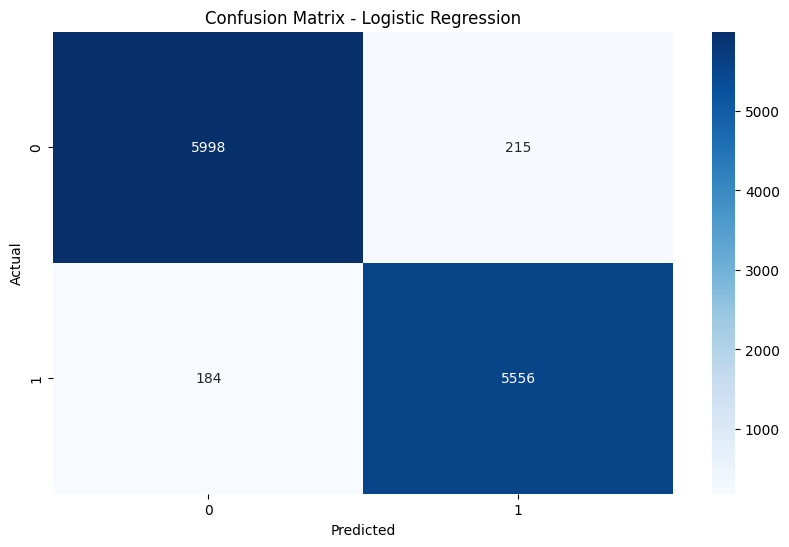

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,n_estimators=30,max_depth=8,min_samples_split=10,min_samples_leaf=10)
rf.fit(X_train_reduced, y_train)

y_train_pred = rf.predict(X_train_reduced)
y_pred = rf.predict(X_test_reduced)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Testing_Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.9666792168674698
Testing_Accuracy: 0.9572492261356982
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      6213
           1       0.95      0.96      0.96      5740

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953



In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(RandomForestClassifier(random_state=42,n_estimators=30,max_depth=8,min_samples_split=10,min_samples_leaf=10),
                            X_train_reduced, y_train,
                            cv=kf, scoring='accuracy')

print("\nK-Fold Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


K-Fold Cross-Validation Scores: [0.95994562 0.96287388 0.96088684 0.96245163 0.96203326]
Mean CV Accuracy: 0.9616382448208851
Standard Deviation: 0.001074616151265527


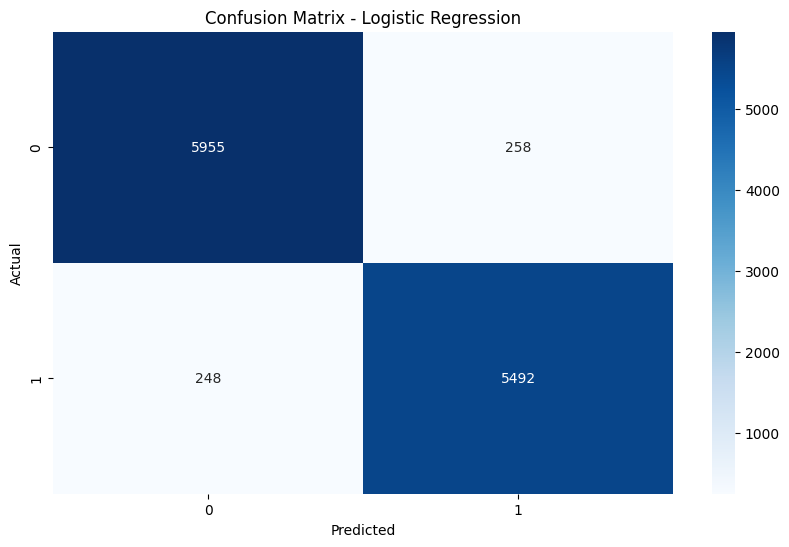

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, eval_metric='logloss',max_depth=5, min_child_weight=5,reg_alpha=0.1,reg_lambda=5,learning_rate=0.02, n_estimators=500,)
xgb.fit(X_train_reduced, y_train)

y_pred = xgb.predict(X_test_reduced)
y_train_pred = xgb.predict(X_train_reduced)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.9839775769745649
Testing Accuracy: 0.9758219693800719
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6213
           1       0.98      0.97      0.97      5740

    accuracy                           0.98     11953
   macro avg       0.98      0.98      0.98     11953
weighted avg       0.98      0.98      0.98     11953



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(XGBClassifier(random_state=42, eval_metric='logloss',max_depth=5, min_child_weight=5,reg_alpha=0.1,reg_lambda=5,learning_rate=0.02, n_estimators=500),
                            X_train_reduced, y_train,
                            cv=kf, scoring='accuracy')

print("\nK-Fold Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


K-Fold Cross-Validation Scores: [0.97416858 0.97573729 0.97584187 0.9739567  0.97657149]
Mean CV Accuracy: 0.9752551877889024
Standard Deviation: 0.0010174531497382676


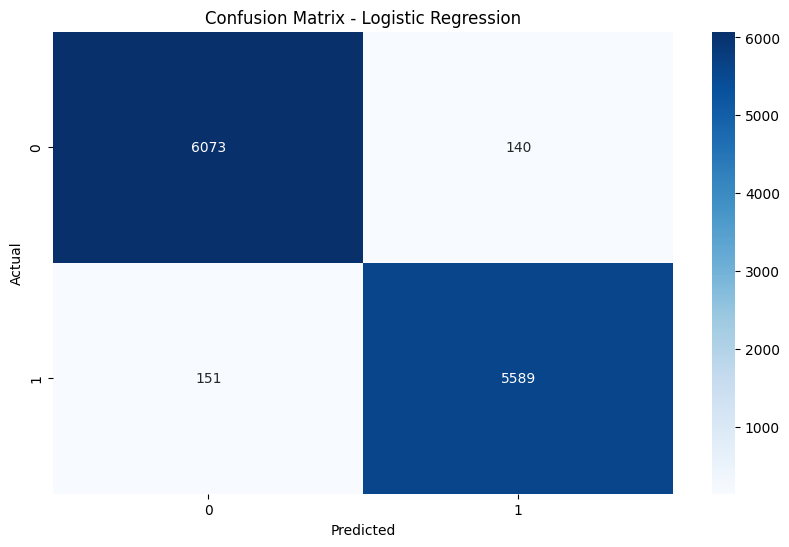

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGB classifier")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_reduced, y_train)

y_train_pred = logreg.predict(X_train_reduced)
y_pred = logreg.predict(X_test_reduced)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9695030120481928
Testing Accuracy: 0.9667865807747009
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      6213
           1       0.96      0.97      0.97      5740

    accuracy                           0.97     11953
   macro avg       0.97      0.97      0.97     11953
weighted avg       0.97      0.97      0.97     11953



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(LogisticRegression(random_state=42, max_iter=1000),
                            X_train_reduced, y_train,
                            cv=kf, scoring='accuracy')


print("\nK-Fold Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


K-Fold Cross-Validation Scores: [0.96810291 0.97050826 0.96904413 0.96747202 0.96789039]
Mean CV Accuracy: 0.9686035424055592
Standard Deviation: 0.0010827409606775373


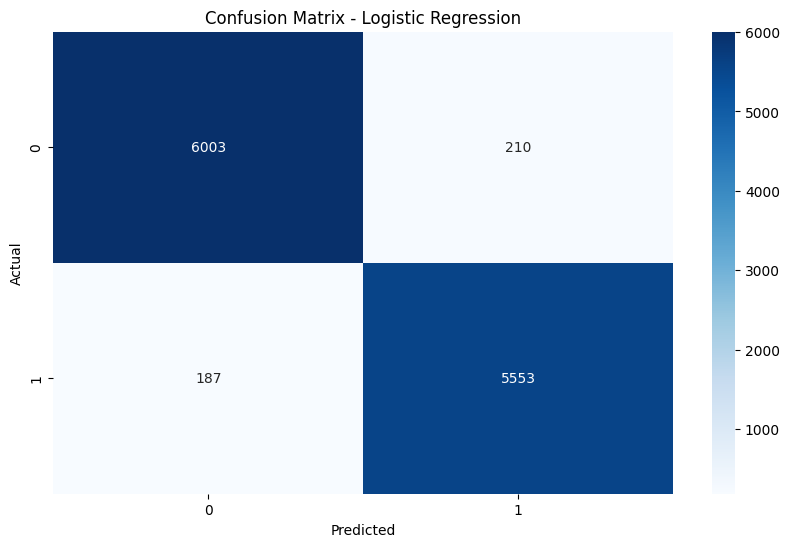

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train_reduced, y_train)

y_train_pred = svm.predict(X_train_reduced)
y_pred = svm.predict(X_test_reduced)


train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9847305890227577
Testing Accuracy: 0.9801723416715469
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6213
           1       0.98      0.98      0.98      5740

    accuracy                           0.98     11953
   macro avg       0.98      0.98      0.98     11953
weighted avg       0.98      0.98      0.98     11953



In [ ]:
from sklearn.model_selection import KFold, cross_val_score


kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(SVC(random_state=42),
                            X_train_reduced, y_train,
                            cv=kf, scoring='accuracy')


print("\nK-Fold Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


K-Fold Cross-Validation Scores: [0.98065258 0.9827442  0.98148923 0.98180107 0.98305617]
Mean CV Accuracy: 0.9819486479237085
Standard Deviation: 0.0008685761375190326


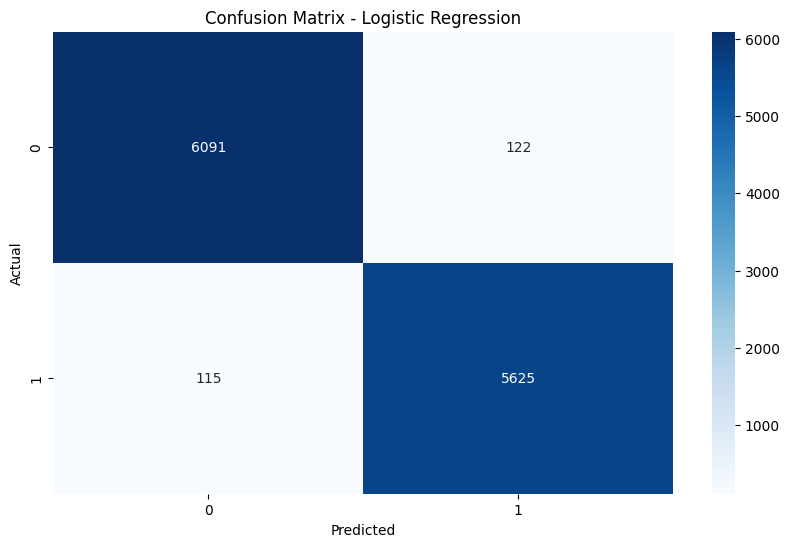

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(weights="uniform",leaf_size=20,n_neighbors=10)
knn.fit(X_train_reduced, y_train)

y_train_pred = knn.predict(X_train_reduced)
y_pred = knn.predict(X_test_reduced)


train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9747740963855421
Testing Accuracy: 0.9666192587634903
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      6213
           1       0.96      0.97      0.97      5740

    accuracy                           0.97     11953
   macro avg       0.97      0.97      0.97     11953
weighted avg       0.97      0.97      0.97     11953



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(KNeighborsClassifier(),
                            X_train_reduced, y_train,
                            cv=kf, scoring='accuracy')

print("\nK-Fold Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


K-Fold Cross-Validation Scores: [0.96862581 0.96747542 0.96695252 0.96673988 0.96841335]
Mean CV Accuracy: 0.9676413962189218
Standard Deviation: 0.0007589209055756722


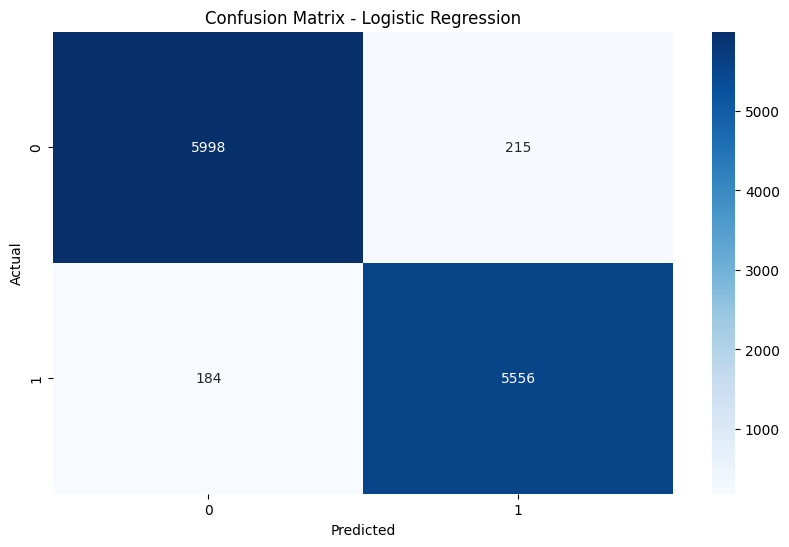

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNeighbors Classifier")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42,n_estimators=200,learning_rate=0.05)
gb.fit(X_train_reduced, y_train)

y_train_pred = gb.predict(X_train_reduced)
y_pred = gb.predict(X_test_reduced)


train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9755689424364123
Testing Accuracy: 0.969714715970886
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      6213
           1       0.97      0.97      0.97      5740

    accuracy                           0.97     11953
   macro avg       0.97      0.97      0.97     11953
weighted avg       0.97      0.97      0.97     11953



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(GradientBoostingClassifier(random_state=42,n_estimators=200,learning_rate=0.05),
                            X_train_reduced, y_train,
                            cv=kf, scoring='accuracy')

print("\nK-Fold Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


K-Fold Cross-Validation Scores: [0.97218155 0.97228613 0.97165865 0.96966844 0.9714465 ]
Mean CV Accuracy: 0.971448255907679
Standard Deviation: 0.0009435842937346845


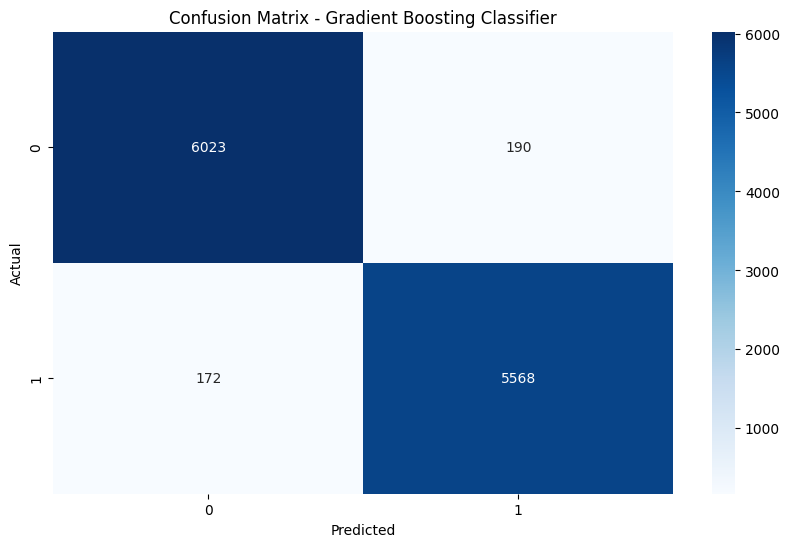

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()

In [ ]:
import joblib
joblib.dump(dt, "decision_tree_model.pkl")
joblib.dump(rf, "Random_forest_model.pkl")
joblib.dump(xgb, "XGB_classifier_model.pkl")
joblib.dump(logreg, "Logistic_regression_model.pkl")
joblib.dump(svm, "Support_vector_classifier_model.pkl")
joblib.dump(knn, "K_neighbours_classifier.pkl")
joblib.dump(gb, "Gradient_boosting_classifier.pkl")

['Gradient_boosting_classifier.pkl']

In [ ]:
svm_loaded = joblib.load("Support_vector_classifier_model.pkl")

In [ ]:
svm_loaded.predict(X_test_reduced)
accuracy_score(y_test, svm_loaded.predict(X_test_reduced))

0.9801723416715469